In [103]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My Drive/Carlo/Python Notebooks

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/My Drive/Carlo/Python Notebooks


In [104]:
seed = 42

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['MPLCONFIGDIR'] = os.getcwd()+'/configs/'

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

import numpy as np
np.random.seed(seed)

import logging

import random
random.seed(seed)

In [105]:
# Import tensorflow
import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl
tf.autograph.set_verbosity(0)
tf.get_logger().setLevel(logging.ERROR)
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)
print(tf.__version__)

2.14.0


In [106]:
# Import other libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', size=16)
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Load penguins dataset
penguins = pd.read_csv('penguins.csv')

# Delete missing data
penguins.dropna(axis=0, inplace=True)

print(penguins)
penguins_species_dict = {
    "0" : "Adelie",
    "1" : "Chinstrap",
    "2" : "Gentoo"
}

penguins_island_dict = {
    "0" : "Torgersen",
    "1" : "Biscoe",
    "2" : "Dream"
}

In [108]:
def dummyEncode(df):
        columnsToEncode = list(df.select_dtypes(include=['category','object']))
        le = LabelEncoder()
        for feature in columnsToEncode:
            try:
                df[feature] = le.fit_transform(df[feature])
            except:
                print(f'Error encoding {feature}')
        return df

dummyEncode(penguins)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,1
1,0,2,39.5,17.4,186.0,3800.0,0
2,0,2,40.3,18.0,195.0,3250.0,0
4,0,2,36.7,19.3,193.0,3450.0,0
5,0,2,39.3,20.6,190.0,3650.0,1
...,...,...,...,...,...,...,...
338,2,0,47.2,13.7,214.0,4925.0,0
340,2,0,46.8,14.3,215.0,4850.0,0
341,2,0,50.4,15.7,222.0,5750.0,1
342,2,0,45.2,14.8,212.0,5200.0,0


In [109]:
# Describe penguins dataset
penguins.describe


<bound method NDFrame.describe of      species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0          0       2            39.1           18.7              181.0   
1          0       2            39.5           17.4              186.0   
2          0       2            40.3           18.0              195.0   
4          0       2            36.7           19.3              193.0   
5          0       2            39.3           20.6              190.0   
..       ...     ...             ...            ...                ...   
338        2       0            47.2           13.7              214.0   
340        2       0            46.8           14.3              215.0   
341        2       0            50.4           15.7              222.0   
342        2       0            45.2           14.8              212.0   
343        2       0            49.9           16.1              213.0   

     body_mass_g  sex  
0         3750.0    1  
1         3800.0    0  
2    

In [110]:
# Find unique species and their counts
unique, count = np.unique(penguins['species'], return_counts=True)
unique, count = np.unique(penguins['island'], return_counts=True)

print('Target labels;', unique)
for i,u in enumerate((unique)):
  print(f'Species {penguins_species_dict.get(str(i))} has {count[i]} samples')

print("\n")
print('Island labels;', unique)
for i,u in enumerate((unique)):
  print(f'Species {penguins_island_dict.get(str(i))} has {count[i]} samples')


Target labels; [0 1 2]
Species Adelie has 163 samples
Species Chinstrap has 123 samples
Species Gentoo has 47 samples


Island labels; [0 1 2]
Species Torgersen has 163 samples
Species Biscoe has 123 samples
Species Dream has 47 samples


Split in train, validation and test

In [111]:
# Split the dataset into a combined training and validation set, and a separate test set
X_train_val, X_test, y_train_val, y_test = train_test_split(
    penguins[penguins.columns[1:]],
    pd.DataFrame(penguins['species'], columns=['species']),
    test_size = 0.1,
    random_state=seed,
    stratify=pd.DataFrame(penguins['species'], columns=['species'])
)

# Further split the combined training and validation set into a training set and a validation set
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val,
    y_train_val,
    test_size = len(X_test), # Ensure validation set size matches test set size
    random_state=seed,
    stratify=y_train_val
)

# Print the shapes of the resulting datasets
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(265, 6) (265, 1)
(34, 6) (34, 1)
(34, 6) (34, 1)


In [112]:
# Compute and store the maximum values for each feature in the training dataset
max_df = X_train.max()
print('Penguins dataset maximum values')
print(max_df)

# Compute and store the minimum values for each feature in the training dataset
min_df = X_train.min()
print('\nPenguins dataset minimum values')
print(min_df)

Penguins dataset maximum values
island                  2.0
bill_length_mm         59.6
bill_depth_mm          21.2
flipper_length_mm     231.0
body_mass_g          6300.0
sex                     1.0
dtype: float64

Penguins dataset minimum values
island                  0.0
bill_length_mm         32.1
bill_depth_mm          13.1
flipper_length_mm     172.0
body_mass_g          2700.0
sex                     0.0
dtype: float64


In [113]:
# Normalise the dataset splits in the range [0,1]
# How to avoid normalizing island values?
X_train_val = (X_train_val - min_df) / (max_df - min_df)
X_train = (X_train - min_df)/(max_df - min_df)
X_val = (X_val - min_df)/(max_df - min_df)
X_test = (X_test - min_df)/(max_df - min_df)

In [114]:
# Compute and store the maximum values for the training dataset labels
max_y = y_train.max()
print('Penguins dataset labels maximum valus')
print(max_y)

# Compute and store the minimum values for the training dataset labels
min_y = y_train.min()
print('\Penguins dataset labels minimum valus')
print(min_y)

Penguins dataset labels maximum valus
species    2
dtype: int64
\Penguins dataset labels minimum valus
species    0
dtype: int64


# Auxiliary functions

In [ ]:
# Create three separate subplots to visualize the sorted target variable values for the training, validation, and test sets

# Create a figure for the training labels subplot
plt.figure(figsize=(20, 2))
plt.scatter(np.arange(len(y_train)), np.sort(y_train, axis=0))
plt.title('Training labels')
plt.xticks([])  # Remove x-axis ticks
plt.grid(0.2)   # Add a grid with opacity 0.2 for reference
plt.ylim([-0.1, 1.1])  # Set the y-axis limits to [0.1, 1.1]

# Create a figure for the validation labels subplot
plt.figure(figsize=(20, 2))
plt.scatter(np.arange(len(y_val)), np.sort(y_val, axis=0))
plt.title('Validation labels')
plt.xticks([])  # Remove x-axis ticks
plt.grid(0.2)   # Add a grid with opacity 0.2 for reference
plt.ylim([-0.1, 1.1])  # Set the y-axis limits to [0.1, 1.1]

# Create a figure for the test labels subplot
plt.figure(figsize=(20, 2))
plt.scatter(np.arange(len(y_test)), np.sort(y_test, axis=0))
plt.title('Test labels')
plt.xticks([])  # Remove x-axis ticks
plt.grid(0.2)   # Add a grid with opacity 0.2 for reference
plt.ylim([-0.1, 1.1])  # Set the y-axis limits to [0.1, 1.1]

# Display the plots
plt.show()

In [116]:
# Define the input shape for the neural network, excluding the batch size
input_shape = X_train.shape[1:]

# Define the batch size for training
batch_size = 64

# Define the number of training epochs
epochs = 2000

# Create an empty dictionary to store metadata
metadata = {}

In [117]:
# Define a function for plotting training and validation Mean Squared Error (MSE) histories.
def plot_histories(metadata, training=False, baseline=False, show_all=False):

    print('Validation MSE')
    plt.figure(figsize=(21, 9))

    # Iterate through different models stored in metadata.
    for model in list(metadata.keys()):

        # Skip the baseline model if baseline flag is False.
        if model == 'Baseline' and not baseline:
            continue

        # Retrieve relevant information from the metadata dictionary.
        history = metadata[model]['history']
        patience = metadata[model]['patience']
        color = metadata[model]['color']
        val_score = metadata[model]['val_score']
        print('%s: %.4f' % (model, val_score))

        # Plot training and validation MSE histories with or without patience handling.
        if patience != 0:
            if training:
                plt.plot(
                    history['mse'][:-patience],
                    alpha=0.5,
                    color=color
                )
                if show_all:
                    plt.plot(
                        np.arange(len(history['mse']) - patience - 1, len(history['mse'])),
                        history['mse'][-patience - 1:],
                        alpha=0.2,
                        color=color
                    )

            plt.plot(
                history['val_mse'][:-patience],
                label=model,
                alpha=0.9,
                color=color
            )
            if show_all:
                plt.plot(
                    np.arange(len(history['val_mse']) - patience - 1, len(history['val_mse'])),
                    history['val_mse'][-patience - 1:],
                    alpha=0.2,
                    color=color
                )

        else:
            if training:
                plt.plot(
                    history['mse'],
                    alpha=0.5,
                    color=color
                )
            plt.plot(
                history['val_mse'],
                label=model,
                alpha=0.9,
                color=color
            )

        # Set y-axis limits and add labels, legends, and grid.
        if training:
            plt.ylim(0.004, 0.0225)
        else:
            plt.ylim(0.01, 0.025)
        plt.title('Mean Squared Error')
        plt.legend(loc='upper right')
        plt.grid(alpha=0.3)

    # Display the plot.
    plt.show()

In [118]:
# Define a function for plotting residuals and model predictions
def plot_residuals(model, data, labels):
    # Sort the data and labels based on the 'labels' column
    data['sort'] = labels
    data = data.sort_values(by=['sort'])
    labels = np.expand_dims(data['sort'], 1)
    data.drop(['sort'], axis=1, inplace=True)

    # Make predictions using the model
    y_pred = model.predict(data, verbose=0)

    # Calculate squared errors and mean squared error (MSE)
    squared_errors = (labels - y_pred)**2
    mse = np.mean(squared_errors).astype('float32')
    print('MSE: %.4f' % mse)

    # Set up plotting styles and create a scatter plot
    mpl.rcParams.update(mpl.rcParamsDefault)
    sns.set(font_scale=1.1, style=None, palette='Set1')
    plt.figure(figsize=(21, 5))

    # Plot true labels in red and model predictions in blue
    plt.scatter(np.arange(len(labels)), labels, label='True', color='#d62728', alpha=0.7, s=8)

    # Add vertical lines to represent residuals
    for i in range(len(labels)):
        if labels[i] >= y_pred[i]:
            plt.vlines(i, y_pred[i], labels[i], alpha=0.2, linewidth=0.5)
        else:
            plt.vlines(i, labels[i], y_pred[i], alpha=0.2, linewidth=0.5)

    plt.scatter(np.arange(len(y_pred)), y_pred, label='Prediction', color='#1f77b4', s=8)

    # Add legends, grid, and set y-axis limits
    plt.legend()
    plt.grid(alpha=0.3)
    plt.ylim((-0.1, 1.1))
    plt.show()

# Baseline

Build the model

In [ ]:
def build_baseline_model(input_shape, learning_rate=1e-3, seed=seed):
    tf.random.set_seed(seed)

    # Build the neural network layer by layer
    input_layer = tfkl.Input(shape=input_shape, name='Input')
    x = tfkl.Dense(units=256, kernel_initializer=tfk.initializers.HeUniform(seed=seed), name='HiddenDense1')(input_layer)
    x = tfkl.Activation('relu', name='HiddenActivation1')(x)
    x = tfkl.Dense(units=256, kernel_initializer=tfk.initializers.HeUniform(seed=seed), name='HiddenDense2')(x)
    x = tfkl.Activation('relu', name='HiddenActivation2')(x)
    output_layer = tfkl.Dense(units=1, kernel_initializer=tfk.initializers.GlorotUniform(seed=seed),name='Output')(x)
    output_activation = tfkl.Activation('linear', name='OutputActivation')(output_layer)

    # Connect input and output through the Model class
    model = tfk.Model(inputs=input_layer, outputs=output_activation, name='baseline_model')

    # Compile the model
    opt = tfk.optimizers.Adam(learning_rate)
    loss = tfk.losses.MeanSquaredError()
    mtr = ['mse']
    model.compile(loss=loss, optimizer=opt, metrics=mtr)

    # Return the model
    return model

Model: "baseline_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 6)]               0         
                                                                 
 HiddenDense1 (Dense)        (None, 256)               1792      
                                                                 
 HiddenActivation1 (Activat  (None, 256)               0         
 ion)                                                            
                                                                 
 HiddenDense2 (Dense)        (None, 256)               65792     
                                                                 
 HiddenActivation2 (Activat  (None, 256)               0         
 ion)                                                            
                                                                 
 Output (Dense)              (None, 1)              

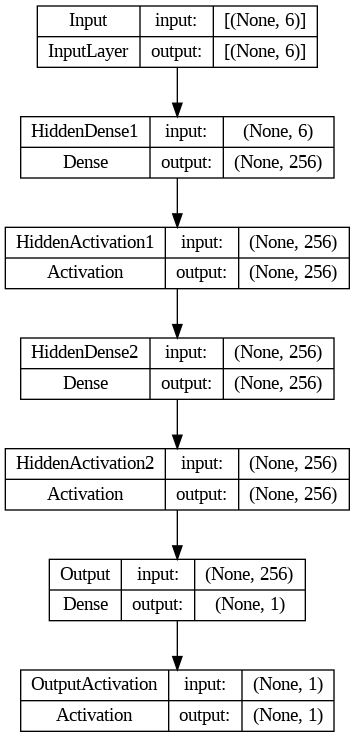

In [119]:
model = build_baseline_model(input_shape)
model.summary()
tfk.utils.plot_model(model, show_shapes=True, expand_nested=True)

In [120]:
history = model.fit(
    x = X_train,
    y = y_train,
    validation_data = (X_val, y_val),
    batch_size = batch_size,
    epochs = epochs
).history

Epoch 1/2000
5/5 [==============================] - 2s 115ms/step - loss: 1.5823 - mse: 1.5823 - val_loss: 1.2012 - val_mse: 1.2012
Epoch 2/2000
5/5 [==============================] - 0s 32ms/step - loss: 0.5164 - mse: 0.5164 - val_loss: 0.2902 - val_mse: 0.2902
Epoch 3/2000
5/5 [==============================] - 0s 20ms/step - loss: 0.3966 - mse: 0.3966 - val_loss: 0.1703 - val_mse: 0.1703
Epoch 4/2000
5/5 [==============================] - 0s 20ms/step - loss: 0.1577 - mse: 0.1577 - val_loss: 0.2100 - val_mse: 0.2100
Epoch 5/2000
5/5 [==============================] - 0s 19ms/step - loss: 0.1617 - mse: 0.1617 - val_loss: 0.0875 - val_mse: 0.0875
Epoch 6/2000
5/5 [==============================] - 0s 21ms/step - loss: 0.1160 - mse: 0.1160 - val_loss: 0.0993 - val_mse: 0.0993
Epoch 7/2000
5/5 [==============================] - 0s 20ms/step - loss: 0.0754 - mse: 0.0754 - val_loss: 0.1208 - val_mse: 0.1208
Epoch 8/2000
5/5 [==============================] - 0s 43ms/step - loss: 0.0802 - 

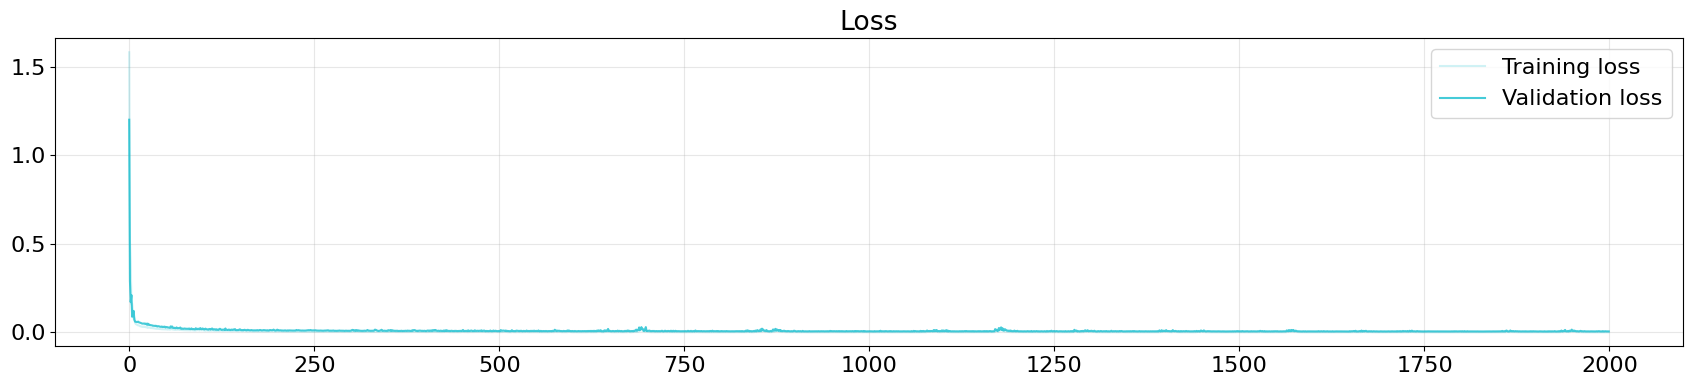

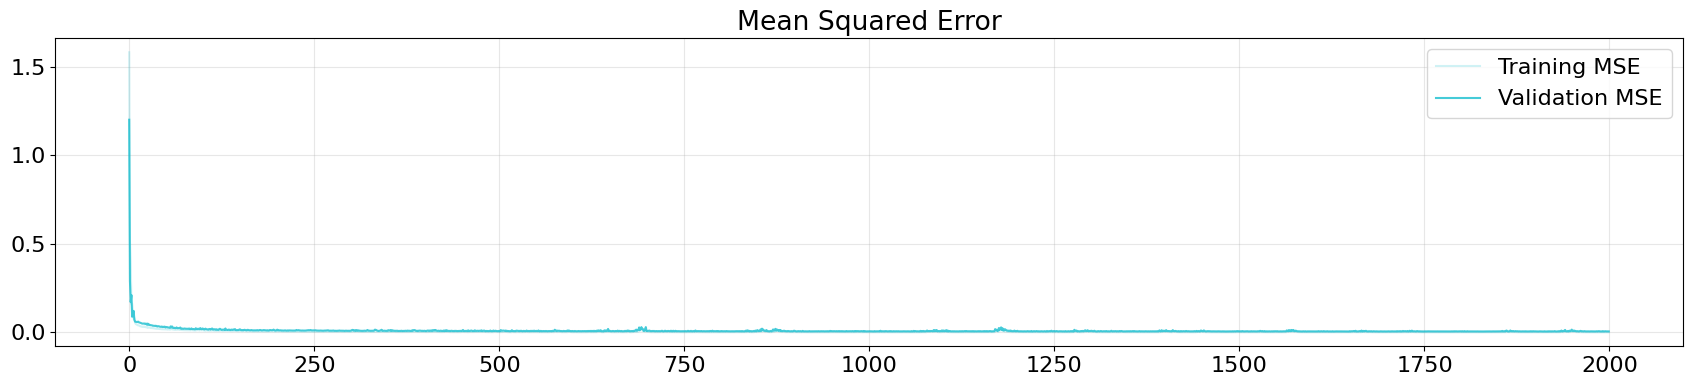

In [121]:
# Set the number of initial data points to ignore
ignore = 0

# Create a figure for loss visualization
plt.figure(figsize=(21, 4))

# Plot training and validation loss
plt.plot(history['loss'][ignore:], label='Training loss', alpha=.2, color='#17becf')
plt.plot(history['val_loss'][ignore:], label='Validation loss', alpha=.8, color='#17becf')
plt.title('Loss')
plt.legend()
plt.grid(alpha=.3)

# Create a figure for Mean Squared Error visualization
plt.figure(figsize=(21, 4))

# Plot training and validation MSE
plt.plot(history['mse'][ignore:], label='Training MSE', alpha=.2, color='#17becf')
plt.plot(history['val_mse'][ignore:], label='Validation MSE', alpha=.8, color='#17becf')
plt.title('Mean Squared Error')
plt.legend()
plt.grid(alpha=.3)

# Display the plots
plt.show()

Validation MSE
Baseline: 0.0050


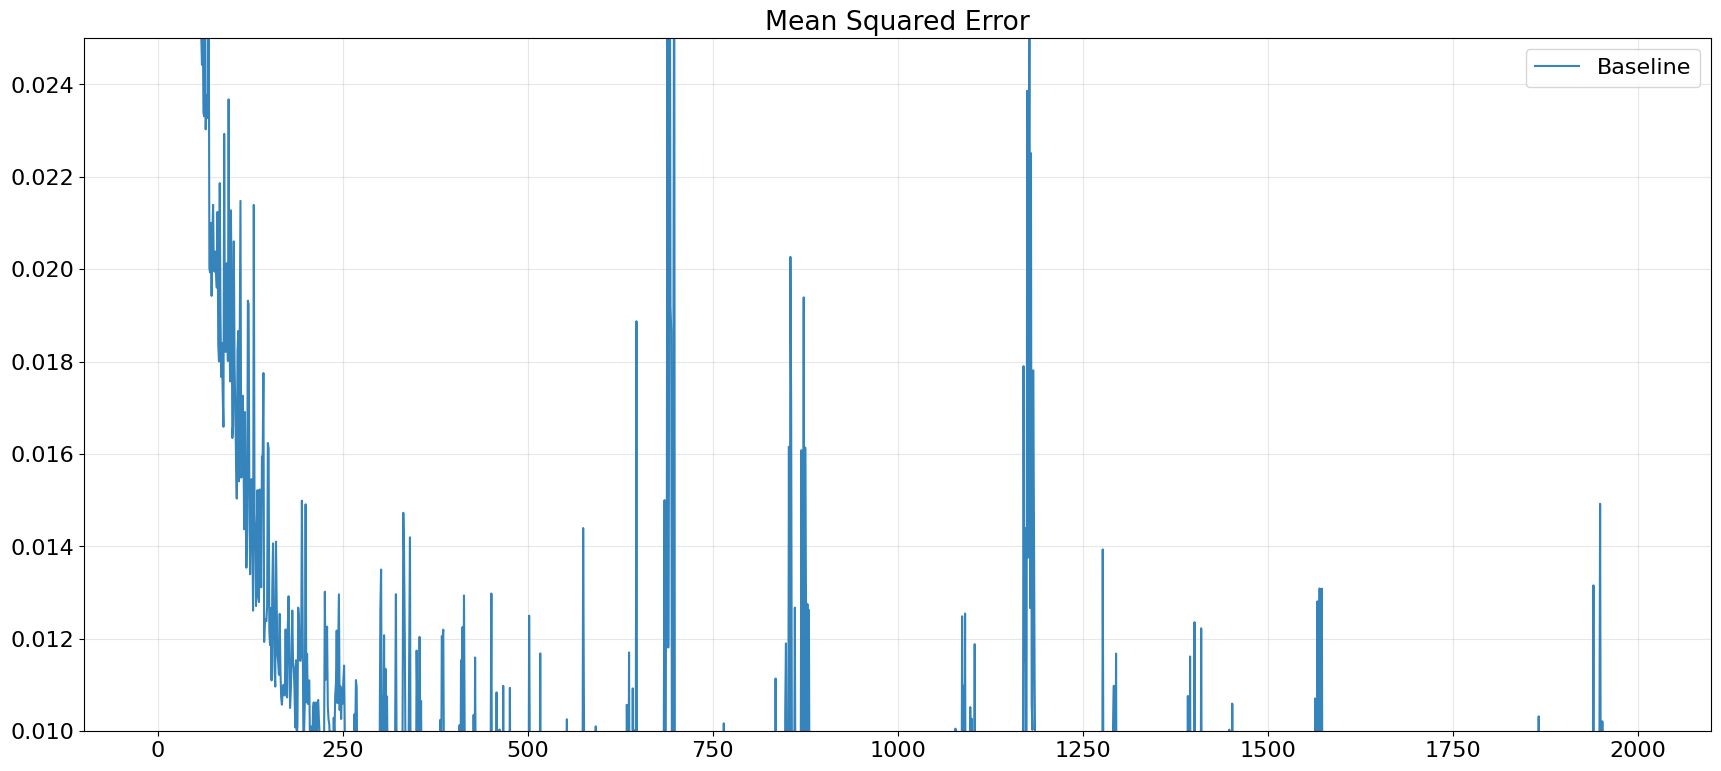

In [122]:
# Calculate validation Mean Squared Error (MSE)
val_squared_errors = (y_val - model.predict(X_val, verbose=0))**2
val_mse = np.mean(val_squared_errors).astype('float32')[0]

# Calculate test Mean Squared Error (MSE)
test_squared_errors = (y_test - model.predict(X_test, verbose=0))**2
test_mse = np.mean(test_squared_errors).astype('float32')[0]

# Add baseline model metadata to the dictionary
metadata['Baseline'] = {
    'model': model,
    'history': history,
    'patience': 0,
    'color': '#1f77b4',
    'val_score': val_mse,
    'test_score': test_mse
}

# Plot histories, including baseline model
plot_histories(metadata, baseline=True)

# Dropout

# K-Fold Cross Validation

How to add other samples and check what the model predicts?